# MFCC theory and implementation
- Link: https://www.kaggle.com/ilyamich/mfcc-implementation-and-tutorial

## Sample Signal

In [1]:
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
TRAIN_PATH = '/Users/tomaspetricek/TUL/TUL_2020:21/BP/Speech_Emotion_Recognition/Datasets/english/RAVDESS/converted/Audio_Speech_Actors_01-24/Actor_01/'
ipd.Audio(TRAIN_PATH + "03-01-01-01-01-01-01.wav")

In [3]:
sample_rate, audio = wavfile.read(TRAIN_PATH + "03-01-01-01-01-01-01.wav")
print("Sample rate: {0}Hz".format(sample_rate))
print("Audio duration: {}s".format(len(audio) / sample_rate))

Sample rate: 16000Hz
Audio duration: 3.3033125s


In [4]:
audio

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [5]:
def normalize_audio(audio):
    audio = audio / np.max(np.abs(audio))
    return audio

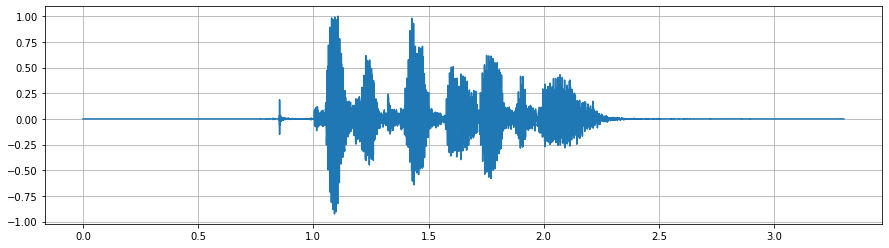

In [6]:
audio = normalize_audio(audio)
plt.figure(figsize=(15, 4))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.grid(True)

## Audio Framing

In [7]:
def frame_audio(audio, FFT_size=2048, hop_size=10, sample_rate=44100):
    # hop_size in ms
    
    audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    frame_num = int((len(audio) - FFT_size) / frame_len) + 1
    frames = np.zeros((frame_num, FFT_size))
    
    for n in range(frame_num):
        frames[n] = audio[n * frame_len: n * frame_len + FFT_size]
        
    return frames

In [8]:
hop_size = 15 #ms
FFT_size = 2048

audio_framed = frame_audio(audio, FFT_size, hop_size=hop_size, sample_rate=sample_rate)
print("Framed audio shape: {0}".format(audio_framed.shape))

Framed audio shape: (221, 2048)


In [9]:
print("First frame:")
audio_framed[1]

First frame:


array([0., 0., 0., ..., 0., 0., 0.])

## Convert to frequency domain

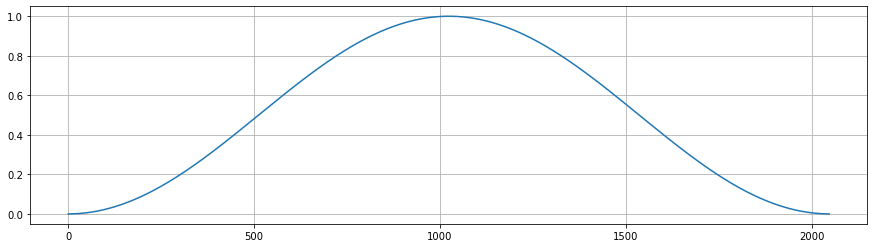

In [10]:
window = get_window("hann", FFT_size, fftbins=True)
plt.figure(figsize=(15,4))
plt.plot(window)
plt.grid(True)

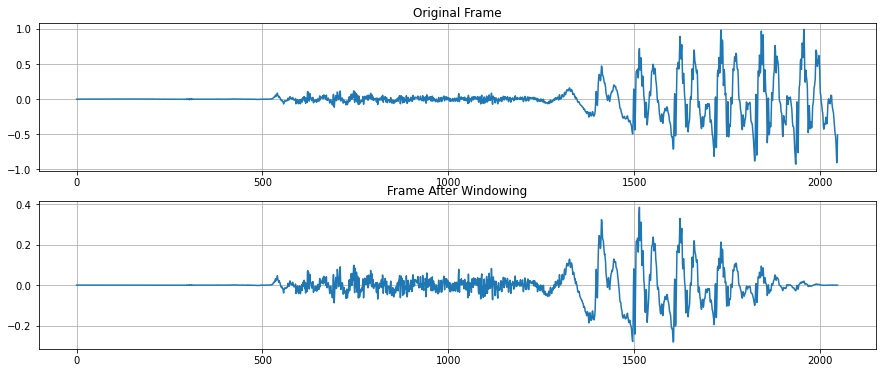

In [11]:
audio_win = audio_framed * window

ind = 69
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.plot(audio_framed[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(audio_win[ind])
plt.title('Frame After Windowing')
plt.grid(True)

In [12]:
audio_winT = np.transpose(audio_win)

audio_fft = np.empty((int(1 + FFT_size // 2), audio_winT.shape[1]), dtype=np.complex64, order='F')

for n in range(audio_fft.shape[1]):
    audio_fft[:, n] = fft.fft(audio_winT[:, n], axis=0)[:audio_fft.shape[0]]

audio_fft = np.transpose(audio_fft)

## Calculate signal power

In [13]:
audio_power = np.square(np.abs(audio_fft))
print(audio_power.shape)

(221, 1025)


## MEL-spaced filterbank

In [14]:
freq_min = 0
freq_high = sample_rate / 2
mel_filter_num = 10

print("Minimum frequency: {0}".format(freq_min))
print("Maximum frequency: {0}".format(freq_high))

Minimum frequency: 0
Maximum frequency: 8000.0
